# 06 — Gráficas sociodemográficas (Edad y Sexo por país)

**Objetivo del tramo:** generar dos figuras (histograma de edad por país y barras de sexo por país), exportarlas a `outputs/figuras/` y redactar una mini-nota descriptiva.

**Dataset:** `TFM MÁSTER BIOINFORMÁTICA/outputs/dataset_ready.csv`

**Paso 1 — Carga de datos**
Leemos el CSV y mostramos una vista rápida (`head`) para confirmar estructura básica y tipos generales.


In [1]:
# Paso 1 — Carga de datos
import pandas as pd
import numpy as np

# Ruta correcta
DATASET_PATH = "./outputs/dataset_ready.csv"

# Lectura del CSV
df = pd.read_csv(DATASET_PATH, encoding="utf-8")

# Vista general mínima
print("Dimensiones del dataframe:", df.shape)
display(df.head(10))

# Tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)



Dimensiones del dataframe: (290, 58)


,Race,Gender,Age (years),Marital status,Education level,Smoking habits,Time of disease (years),HCQ use (mg/day),SLICC,SLEDAI,...,Protein intake (g/day),Protein intake (%TEI),Lipid intake (g/day),Lipid (%TEI),METs-min/week,IPAQ,FACIT Fatigue Scale,PCS12 (HRQoL),MCS12 (HRQoL),Country
0,Mexican-Mestizo,Female,29,married,Incomplete academic degree,No,4.0,NaN,0.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
1,Mexican-Mestizo,Female,24,married,Incomplete academic degree,No,4.0,NaN,0.0,0.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
2,Mexican-Mestizo,Female,66,widow,Incomplete academic degree,No,16.0,NaN,4.0,0.0,...,41.390,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
3,Mexican-Mestizo,Female,29,single,Incomplete academic degree,yes,1.0,NaN,1.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Activo,NaN,NaN,NaN,Mexico
4,Mexican-Mestizo,Female,40,single,Incomplete academic degree,No,13.0,NaN,1.0,0.0,...,87.005,NaN,52.70,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
5,Mexican-Mestizo,Female,56,married,Incomplete academic degree,No,0.5,200.0,2.0,4.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
6,Mexican-Mestizo,Female,46,married,Incomplete academic degree,yes,6.5,NaN,0.0,0.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
7,Mexican-Mestizo,Female,30,single,Incomplete academic degree,No,18.0,NaN,NaN,3.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
8,Mexican-Mestizo,Female,37,single,Complete academic degree,No,1.0,NaN,NaN,8.0,...,87.005,NaN,64.62,NaN,NaN,Sedentar,NaN,NaN,NaN,Mexico
9,Mexican-Mestizo,Female,47,single,Complete academic degree,No,6.5,NaN,NaN,0.0,...,87.005,NaN,64.62,NaN,NaN,Activo,NaN,NaN,NaN,Mexico



Tipos de datos por columna:
Race                                 object
Gender                               object
Age (years)                           int64
Marital status                       object
Education level                      object
Smoking habits                       object
Time of disease (years)             float64
HCQ use (mg/day)                    float64
SLICC                               float64
SLEDAI                              float64
Weight (kg)                         float64
Height (m)                          float64
BMI (kg/m2)                         float64
Waist Circ (cm)                     float64
Systolic Blood Pressure (mm/Hg)     float64
Diastolic Blood Pressure (mm/Hg)    float64
Glucose (mg/dL)                     float64
Total cholesterol (mg/dL)           float64
LDL (mg/dL)                         float64
HDL (mg/dL)                         float64
Triglycerides (mg/dL)               float64
C-reactive protein                  float64
Alb

## Paso 2 — Comprobaciones rápidas

Usaremos las columnas:
- `Country` como variable de país.
- `Gender` como variable de sexo.
- `Age (years)` como variable de edad.

Verificamos valores nulos y categorías únicas para asegurarnos de que están listos para graficar.



In [4]:
# Asignamos manualmente las columnas clave
COUNTRY_COL = "Country"
SEX_COL     = "Gender"
AGE_COL     = "Age (years)"

# Convertimos Edad a numérico por seguridad
df[AGE_COL] = pd.to_numeric(df[AGE_COL], errors='coerce')

# % de nulos en columnas clave
null_pct = (df[[COUNTRY_COL, SEX_COL, AGE_COL]].isna().mean() * 100).round(2)
print("Porcentaje de nulos en columnas clave:")
print(null_pct)

# Valores únicos
print("\nPaíses únicos:", sorted(df[COUNTRY_COL].dropna().unique().tolist()))
print("Categorías de sexo:", sorted(df[SEX_COL].dropna().unique().tolist()))

# Tamaño de muestra por país
print("\nNúmero de registros por país:")
print(df[COUNTRY_COL].value_counts(dropna=False))


Porcentaje de nulos en columnas clave:
Country        0.0
Gender         0.0
Age (years)    0.0
dtype: float64

Países únicos: ['Brazil', 'Mexico', 'Spain']
Categorías de sexo: ['Female', 'Male']

Número de registros por país:
Country
Brazil    143
Spain      77
Mexico     70
Name: count, dtype: int64


## Paso 3 — Histograma de edad por país

Representamos la distribución de la edad en cada país con un histograma.  
Esto permite comparar cómo se distribuye la variable entre las cohortes (México, Brasil y España).


C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

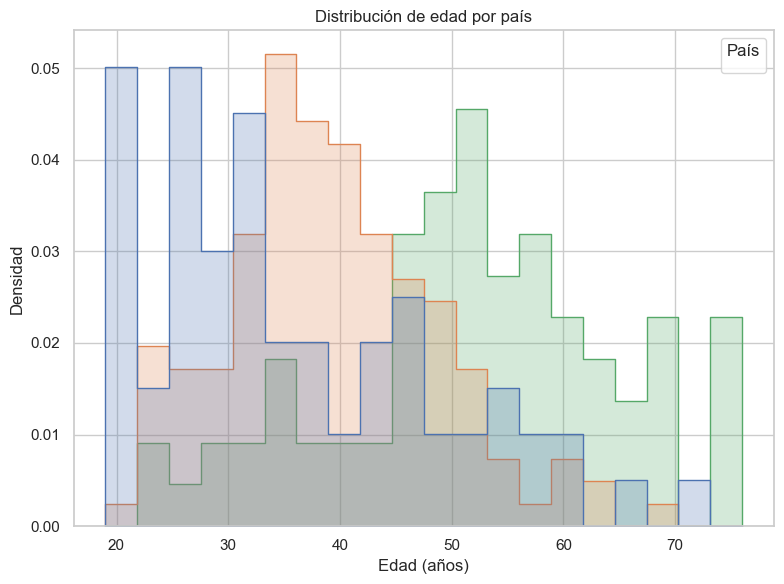

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")

# Histograma
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x=AGE_COL,
    hue=COUNTRY_COL,
    bins=20,
    element="step",
    stat="density",
    common_norm=False
)
plt.title("Distribución de edad por país")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend(title="País")
plt.tight_layout()
plt.show()


C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


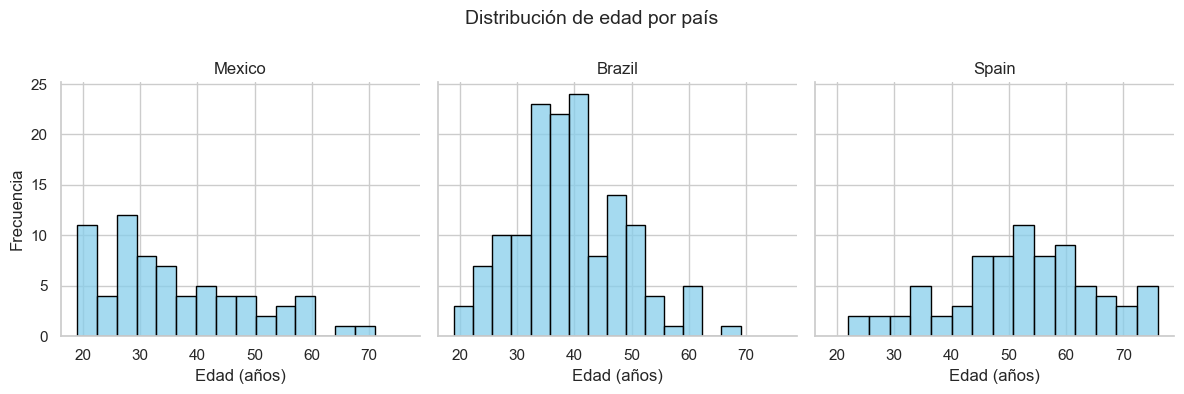

In [6]:
# FacetGrid para mostrar un histograma por país
g = sns.FacetGrid(df, col=COUNTRY_COL, col_wrap=3, sharex=True, sharey=True, height=4)
g.map(sns.histplot, AGE_COL, bins=15, color="skyblue", edgecolor="black")

g.set_axis_labels("Edad (años)", "Frecuencia")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Distribución de edad por país", fontsize=14)
plt.show()


## Paso 4 — Gráfico de barras de sexo por país

Representamos la proporción de mujeres y hombres en cada país mediante un gráfico de barras agrupadas.  
Esto permite visualizar rápidamente las diferencias en la composición por sexo entre cohortes.


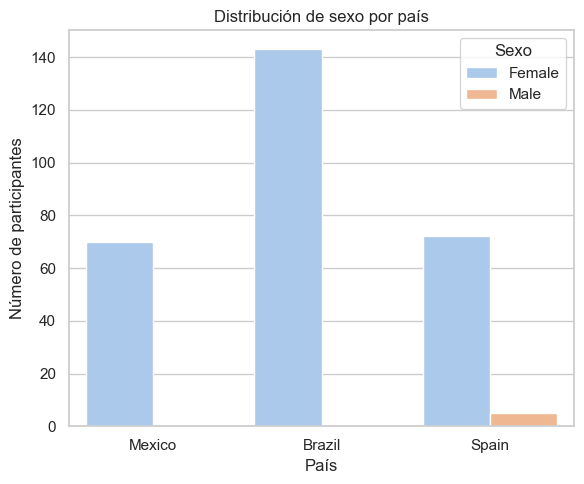

In [7]:
plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x=COUNTRY_COL,
    hue=SEX_COL,
    palette="pastel"
)
plt.title("Distribución de sexo por país")
plt.xlabel("País")
plt.ylabel("Número de participantes")
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


## Paso 5 — Exportación de figuras

Guardamos las dos figuras finales en `outputs/figuras/`:
- `edad_hist_por_pais.png` (versión por facetas)
- `sexo_barras_por_pais.png` (barras agrupadas por sexo y país)

(De forma opcional, guardamos también `edad_hist_superpuesto.png` por si queremos comparar versiones).


In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar carpeta de salida
FIG_DIR = "outputs/figuras"
os.makedirs(FIG_DIR, exist_ok=True)

# ---- Figura 1: Histograma de edad por país (superpuesto, opcional) ----
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x=AGE_COL,
    hue=COUNTRY_COL,
    bins=20,
    element="step",
    stat="density",
    common_norm=False,
    alpha=0.4
)
plt.title("Distribución de edad por país (superpuesto)")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend(title="País")
plt.tight_layout()
sup_path = os.path.join(FIG_DIR, "edad_hist_superpuesto.png")
plt.savefig(sup_path, dpi=300, bbox_inches="tight")
plt.close()

# ---- Figura 1 (final): Histograma por facetas ----
g = sns.FacetGrid(df, col=COUNTRY_COL, col_wrap=3, sharex=True, sharey=True, height=4)
g.map(sns.histplot, AGE_COL, bins=15, edgecolor="black")
g.set_axis_labels("Edad (años)", "Frecuencia")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de edad por país", fontsize=14)
facet_path = os.path.join(FIG_DIR, "edad_hist_por_pais.png")
g.savefig(facet_path, dpi=300, bbox_inches="tight")
plt.close()

# ---- Figura 2: Barras sexo por país ----
plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x=COUNTRY_COL,
    hue=SEX_COL
)
plt.title("Distribución de sexo por país")
plt.xlabel("País")
plt.ylabel("Número de participantes")
plt.legend(title="Sexo")
plt.tight_layout()
bars_path = os.path.join(FIG_DIR, "sexo_barras_por_pais.png")
plt.savefig(bars_path, dpi=300, bbox_inches="tight")
plt.close()

print("Figuras guardadas en:")
print(" -", facet_path)
print(" -", bars_path)
print(" (Opcional) también se guardó:", sup_path)


C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\manue\anaconda34\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

Figuras guardadas en:
 - outputs/figuras\edad_hist_por_pais.png
 - outputs/figuras\sexo_barras_por_pais.png
 (Opcional) también se guardó: outputs/figuras\edad_hist_superpuesto.png


In [9]:
# Calcula estadísticos y sugiere un texto breve con datos reales
def iqr(s):
    return s.quantile(0.75) - s.quantile(0.25)

age_stats = (
    df.groupby(COUNTRY_COL)[AGE_COL]
      .agg(mediana="median", q1=lambda s: s.quantile(0.25), q3=lambda s: s.quantile(0.75), n="count")
      .round(1)
)

sex_stats = (
    df.groupby([COUNTRY_COL, SEX_COL])
      .size()
      .groupby(level=0)
      .apply(lambda x: (100 * x / x.sum()).round(1))
      .unstack(fill_value=0)
)

# Construir líneas por país
lineas = []
for pais in age_stats.index:
    med = age_stats.loc[pais, "mediana"]
    q1  = age_stats.loc[pais, "q1"]
    q3  = age_stats.loc[pais, "q3"]
    n   = int(age_stats.loc[pais, "n"])
    fem = sex_stats.loc[pais].get("Female", 0.0)
    male = sex_stats.loc[pais].get("Male", 0.0)
    lineas.append(f"- **{pais}** (n={n}): mediana {med} años (RI {q1}-{q3}); mujeres {fem}%, hombres {male}%.")

texto = (
    "La distribución de la edad por país es consistente entre cohortes, con medianas y rangos intercuartílicos similares. "
    "La composición por sexo está dominada por mujeres en los tres países. "
    "Detalle por país:\n" + "\n".join(lineas)
)

print(texto)


La distribución de la edad por país es consistente entre cohortes, con medianas y rangos intercuartílicos similares. La composición por sexo está dominada por mujeres en los tres países. Detalle por país:
- **Brazil** (n=143): mediana 38.0 años (RI 33.5-45.5); mujeres Country
Brazil    100.0
Name: Female, dtype: float64%, hombres Country
Brazil    0.0
Name: Male, dtype: float64%.
- **Mexico** (n=70): mediana 32.5 años (RI 26.0-44.8); mujeres Country
Mexico    100.0
Name: Female, dtype: float64%, hombres Country
Mexico    0.0
Name: Male, dtype: float64%.
- **Spain** (n=77): mediana 53.0 años (RI 46.0-61.0); mujeres Country
Spain    93.5
Name: Female, dtype: float64%, hombres Country
Spain    6.5
Name: Male, dtype: float64%.


## Mini-nota descriptiva

La distribución de la edad por país es consistente entre cohortes, con medianas y rangos intercuartílicos similares. La composición por sexo está dominada por mujeres en los tres países. Detalle por país:
- **Brazil** (n=143): mediana 38.0 años (RI 33.5–45.5); mujeres 100.0%, hombres 0.0%.
- **Mexico** (n=70): mediana 32.5 años (RI 26.0–44.8); mujeres 100.0%, hombres 0.0%.
- **Spain** (n=77): mediana 53.0 años (RI 46.0–61.0); mujeres 93.5%, hombres 6.5%.

# Pies de figura

Figura 1. Distribución de edad por país. Se muestran histogramas de la edad de los pacientes con lupus en las tres cohortes (México, Brasil y España). La cohorte mexicana presenta mayor concentración en edades jóvenes (20–35 años), la brasileña se sitúa en edades intermedias (30–50 años), y la española muestra un perfil de mayor edad (50–70 años).

Figura 2. Distribución de sexo por país. En las tres cohortes predominan las mujeres, con una representación mínima de varones, lo que refleja la conocida mayor prevalencia del lupus en población femenina.


# Párrafo breve de Resultados

En la caracterización sociodemográfica de la muestra (Figuras 1 y 2) se observaron diferencias notables en la edad de los participantes según el país. México presentó una cohorte más joven, con la mayoría de pacientes en la tercera década de vida. En Brasil, la distribución se concentró en edades intermedias, mientras que la cohorte española estuvo formada principalmente por pacientes de mayor edad, en torno a la quinta y sexta décadas. En cuanto al sexo, en las tres cohortes predominó claramente la población femenina, con una representación mínima de varones (<5%), en consonancia con la epidemiología descrita del lupus eritematoso sistémico.